In [1]:
import pandas as pd # data processing
import numpy as np # linear algebra
import folium # mapping
from folium import plugins
import seaborn as sns # visualization
import matplotlib.pyplot as plt # visualization

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import tensorflow.keras.backend as be

import pickle

%matplotlib inline

In [26]:
# read crimes file
df = pd.read_csv('boston_corrected.csv')

price = df['CMEDV']

# Account for the error in the original dataset
# Not Accurate!

lon_correct = 0.01
lat_correct = 0.152

df['LON'] -= lon_correct
df['LAT'] += lat_correct

In [4]:
latlon_2D = np.zeros((lon_num, lat_num, 2))

for i in range(lon_num):
    for j in range(lat_num):
        latlon_2D[i, j] = (lon[i], lat[j])

# Creating Maps using (Lon, Lat) Matrix

In [6]:
df = pd.read_csv("boston_corrected.csv")
train_set, test_set = train_test_split(df, test_size=0.2, random_state=26)

In [7]:
input_vars = ["LON", "LAT"]
output_vars = ['DIS', "TRACT", "RM","INDUS",'NOX', 'LSTAT',"ZN", 'PTRATIO', 'CMEDV']

INPUT_SCALER = StandardScaler()
INPUT_SCALER.fit(df[input_vars].values)

input_scalers = {"LAT": INPUT_SCALER}
current_vars =["LON", "LAT"] 
for output in output_vars:
    current_vars.append(output)
    INPUT_SCALER_n = StandardScaler()
    INPUT_SCALER_n.fit(df[current_vars].values)
    

    input_scalers[output] = INPUT_SCALER_n
    print("Input scaler: ", len(input_scalers), " is ", current_vars, " with key: ",output )


INPUT = INPUT_SCALER.transform(train_set[input_vars])
INPUT_TEST = INPUT_SCALER.transform(test_set[input_vars])

Input scaler:  2  is  ['LON', 'LAT', 'DIS']  with key:  DIS
Input scaler:  3  is  ['LON', 'LAT', 'DIS', 'TRACT']  with key:  TRACT
Input scaler:  4  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM']  with key:  RM
Input scaler:  5  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS']  with key:  INDUS
Input scaler:  6  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX']  with key:  NOX
Input scaler:  7  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT']  with key:  LSTAT
Input scaler:  8  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN']  with key:  ZN
Input scaler:  9  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO']  with key:  PTRATIO
Input scaler:  10  is  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO', 'CMEDV']  with key:  CMEDV


In [8]:
def QuadLoss():
    pass
def CreateModel(inSize):
    model = keras.models.Sequential()

    #model.add(keras.Input(shape=inSize))
    model.add(keras.layers.Dense(inSize))

    model.add(keras.layers.Dense(40, activation='relu'))

    model.add(keras.layers.Dense(40, activation='sigmoid'))
    #model.add(keras.layers.Dense(40, activation='sigmoid'))
    model.add(keras.layers.Dense(40, activation='relu'))
    #model.add(keras.layers.Dense(40, activation='selu'))
    model.add(keras.layers.Dense(1))
    model.compile(loss="mse", optimizer="adam", metrics=["mean_squared_error"])

    return model

def TrainModel(model, input_vars, output_var, epochs, batch_size):
    
    #Scale and create our output data
    #OUT_SCALER = StandardScaler()
    #OUT_SCALER.fit(df[output_var])
    
    most_recent = input_vars[len(input_vars)-1]
    
    print(most_recent)
    
    OUTPUT = train_set[output_var].values#OUT_SCALER.transform(train_set[output_var])
    
    input_scaler = input_scalers[most_recent]
    
    ThisInput = input_scaler.transform(train_set[input_vars].values)
    
    model.fit(ThisInput, OUTPUT, epochs=epochs, batch_size=batch_size, verbose=0)
    
    InputTest = input_scaler.transform(test_set[input_vars])
    model_predict = model.predict(InputTest)
    
    #model_predict = OUT_SCALER.inverse_transform(model_predict_scaled)
    
    return model_predict

In [9]:
def TrainAndTest(input_vars, output_var):
    model = CreateModel(len(input_vars))
    predict_vals = TrainModel(model,input_vars, output_var, 100, 10)
    plt.title(output_var)
    plt.plot(predict_vals, label="pred")
    plt.plot(test_set[output_var].values, label="true")
    plt.legend()
    
    plt.show()
    return model

LAT


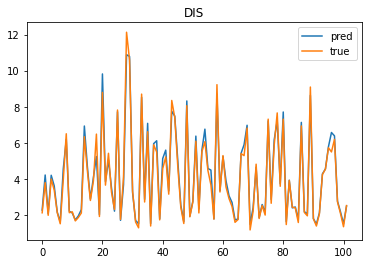

Model  0  has  2 vars:  ['LON', 'LAT']
DIS


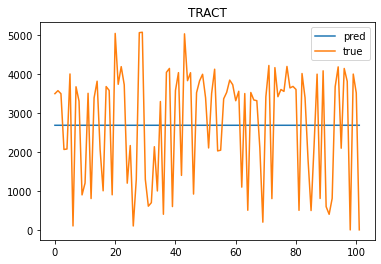

Model  1  has  3 vars:  ['LON', 'LAT', 'DIS']
TRACT


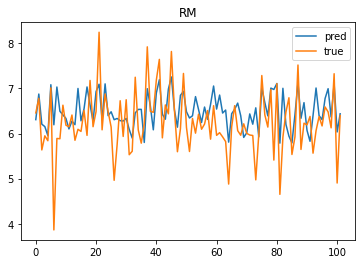

Model  2  has  4 vars:  ['LON', 'LAT', 'DIS', 'TRACT']
RM


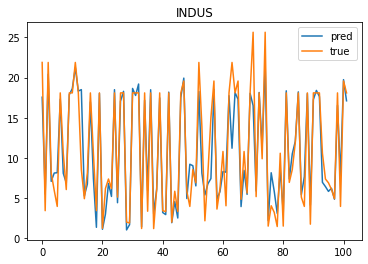

Model  3  has  5 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM']
INDUS


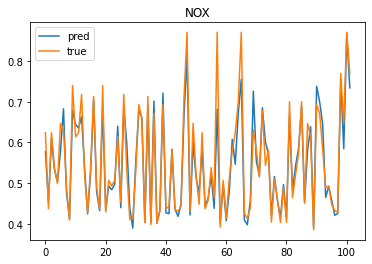

Model  4  has  6 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS']
NOX


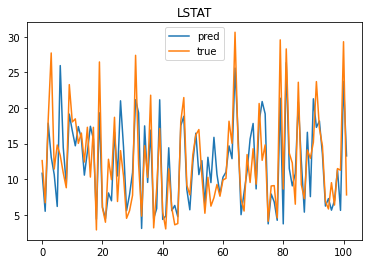

Model  5  has  7 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX']
LSTAT


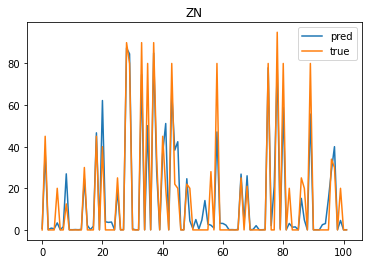

Model  6  has  8 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT']
ZN


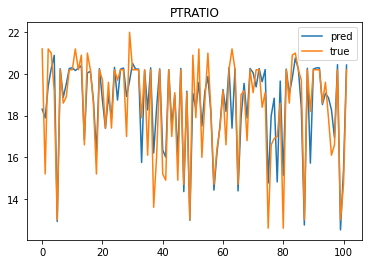

Model  7  has  9 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN']
PTRATIO


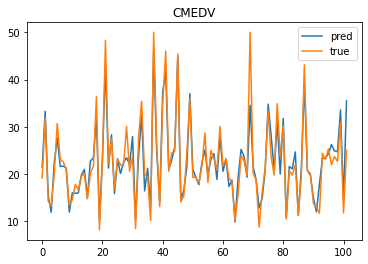

Model  8  has  10 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO']


In [10]:
this_input_vars =  ["LON", "LAT"]

all_models = []


for i, var in enumerate(output_vars):
    all_models.append(TrainAndTest(this_input_vars, var))
    
    print("Model ", i , " has ", len(this_input_vars), "vars: ", this_input_vars)
    
    this_input_vars.append(var)

In [11]:
def CreateModelMaskForMap(model, scaler, gridSize=1, other_masks=None, maskCut=0):
    """
    Create all masks and returns the outputs as 3D array
    """
    height = lat_num
    width = lon_num
    print(width * height)
    # result = np.zeros((height, width, 4))

    extra_vars_len = maskCut

    result = np.zeros((height, width))
    LONLAT = np.zeros((height*width, 2+extra_vars_len))
    
    
    j = 0
    for x in range(width):
        for y in range(height):
            
            vals = np.zeros(2 + extra_vars_len)
            vals[0] = lon[x]
            vals[1] = lat[y]
            
            for i in range(extra_vars_len):
                vals[i+2] = other_masks[y,x, i]
                #vals = 0,0,0
            
            LONLAT[j,:] =  vals
          #  print(x,y, " and", LONLAT[i])
            #print(j,LONLAT[j,:])
            j+=1
            #lon, lat = XYToLat(x,y)
            #val = model.predict(INPUT_SCALER.transform([[lon, lat]]))
            #print(val[0,0])
            #if(val > 5000):
            #result[y,x] = val
    
    #print(LONLAT)
    scaled = scaler.transform(LONLAT)
    print(LONLAT.shape)
    predict =  model.predict(scaled)
    #print(predict)
    i=0
    for x in range(width):
        for y in range(height):
            result[y,x] = predict[i]
            i+=1
            #print(result[y,x])
    #print(min(predict))
    #print(max(predict))
    return result

In [49]:
def CreateAllMasksForMap(models, gridSize=1):
    
    height = lat_num
    width = lon_num
    
    each_mask = np.zeros((height, width, len(output_vars)))
    
    this_output = ["LAT"] + output_vars
    #this_outputappend(output_vars)
    
    print(this_output)
    #We iterate each variable, our model 'i' will predict
    for i,var in enumerate(this_output):
        if(i == len(this_output)-1):
            break
        print(var,i)

        #we get the model that tries to find the current var
        model = models[i]
        #get the current scaler
        scaler = input_scalers[var]
        print(model, ",", i )
        cur_mask = CreateModelMaskForMap(models[i], scaler, gridSize, each_mask, i)
        each_mask[:,:,i] = cur_mask
    return each_mask

this_input_vars =  ["LON", "LAT"]

for i, var in enumerate(output_vars):
    #all_models.append(TrainAndTest(this_input_vars, var))
    
    print("Model ", i , " has ", len(this_input_vars), "vars: ", this_input_vars)
    
    this_input_vars.append(var)

end_mask = CreateAllMasksForMap(all_models)

Model  0  has  2 vars:  ['LON', 'LAT']
Model  1  has  3 vars:  ['LON', 'LAT', 'DIS']
Model  2  has  4 vars:  ['LON', 'LAT', 'DIS', 'TRACT']
Model  3  has  5 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM']
Model  4  has  6 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS']
Model  5  has  7 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX']
Model  6  has  8 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT']
Model  7  has  9 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN']
Model  8  has  10 vars:  ['LON', 'LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO']
['LAT', 'DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO', 'CMEDV']
LAT 0
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6ce04f2dc0> , 0
16800
(16800, 2)
DIS 1
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7f6c5c4f29a0> , 1
16800
(16800, 3)
TRACT 2
<tensorflow.python.keras.engine.sequential.Sequential object at 0x7

In [13]:
print(end_mask[:,:,8])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
print(output_vars)

['DIS', 'TRACT', 'RM', 'INDUS', 'NOX', 'LSTAT', 'ZN', 'PTRATIO', 'CMEDV']


In [15]:
print(lon[0], lat[0])

-70.9 42.1


In [16]:
print(end_mask[224,:,:])

[[   7.95437288 2691.72753906    6.58831644 ...   61.19883728
    17.64827347    0.        ]
 [   7.92506742 2691.72753906    6.5835228  ...   60.73967361
    17.65398788    0.        ]
 [   7.89564371 2691.72753906    6.57870388 ...   60.26043701
    17.66029167    0.        ]
 ...
 [   7.95366812 2691.70751953    6.5212121  ...   69.3924408
    17.59564781    0.        ]
 [   7.97434759 2691.70751953    6.52448559 ...   69.43865204
    17.6141758     0.        ]
 [   7.99496889 2691.70800781    6.52774668 ...   69.4838562
    17.63275909    0.        ]]


In [17]:
print(latlon_2D)

[[[-70.9         42.1       ]
  [-70.9         42.10100446]
  [-70.9         42.10200893]
  ...
  [-70.9         42.32299107]
  [-70.9         42.32399554]
  [-70.9         42.325     ]]

 [[-70.90100334  42.1       ]
  [-70.90100334  42.10100446]
  [-70.90100334  42.10200893]
  ...
  [-70.90100334  42.32299107]
  [-70.90100334  42.32399554]
  [-70.90100334  42.325     ]]

 [[-70.90200669  42.1       ]
  [-70.90200669  42.10100446]
  [-70.90200669  42.10200893]
  ...
  [-70.90200669  42.32299107]
  [-70.90200669  42.32399554]
  [-70.90200669  42.325     ]]

 ...

 [[-71.19799331  42.1       ]
  [-71.19799331  42.10100446]
  [-71.19799331  42.10200893]
  ...
  [-71.19799331  42.32299107]
  [-71.19799331  42.32399554]
  [-71.19799331  42.325     ]]

 [[-71.19899666  42.1       ]
  [-71.19899666  42.10100446]
  [-71.19899666  42.10200893]
  ...
  [-71.19899666  42.32299107]
  [-71.19899666  42.32399554]
  [-71.19899666  42.325     ]]

 [[-71.2         42.1       ]
  [-71.2         42.1010

In [ ]:
df = pd.read_csv('boston_corrected.csv')

lon = df['LON']
lat = df['LAT']

lon = lon.to_numpy()
lat = lat.to_numpy()

# import plotly.express as px

# fig = px.histogram(df, x="LAT")
# fig.show()

lon_min = -71.2
lon_max = -70.9
lon_num = 150

lon = np.linspace(lon_max, lon_min, num=lon_num)

lat_min = 42.1
lat_max = 42.325
lat_num = 112

lat = np.linspace(lat_min, lat_max, num=lat_num)

latlon_2D = np.zeros((lon_num, lat_num, 2))

for i in range(lon_num):
    for j in range(lat_num):
        latlon_2D[i, j] = (lon[i], lat[j])

map_usr = latlon_2D.copy()        

# read crimes file
df = pd.read_csv('boston_corrected.csv')

print("These are the Variable you could look at:")
for i in range(len(output_vars)):
    print(str(i) + " : " + output_vars[i] + " and these values are at a range from "
          + str(np.amax(end_mask[:,:,i])) + " to " + str(np.amin(end_mask[:,:,i])))

# Account for the error in the original dataset
# Not Accurate!

lon_correct = 0.01
lat_correct = 0.152

df['LON'] -= lon_correct
df['LAT'] += lat_correct

m = folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11
)

print("What output do you want to look at and at what range? (pleace input the corresponding number)")
variable = int(input("Corresponding Integer"))
max_usr = float(input("Max Search Value"))
min_usr = float(input("Min Search Value"))

end_mask_copy = end_mask[:,:,variable].copy()

final_result = []

for x in range(1, lat_num-1):
    for y in range(1, lon_num-1):
        if end_mask_copy[x, y] <= max_usr:
            final_result.append((lat[x] + lat_correct, lon[y] + lon_correct))
        if end_mask_copy[x, y] >= min_usr:
            final_result.append((lat[x] + lat_correct, lon[y] + lon_correct))
        else:
            pass
        
m = folium.Map(location = [42.320,-71.05], #Initiate map on Boston city
                  zoom_start = 11,
                  min_zoom = 11)

# plot heatmap
               
m.add_child(plugins.HeatMap(final_result, radius=6))

m

These are the Variable you could look at:
0 : DIS and these values are at a range from 8.360873222351074 to 1.4795993566513062
1 : TRACT and these values are at a range from 2691.7275390625 to 2691.673583984375
2 : RM and these values are at a range from 6.848280906677246 to 5.585078239440918
3 : INDUS and these values are at a range from 27.12101173400879 to 1.8997493982315063
4 : NOX and these values are at a range from 0.646504819393158 to 0.40717023611068726
5 : LSTAT and these values are at a range from 25.17884063720703 to 3.281649351119995
6 : ZN and these values are at a range from 87.13292694091797 to 0.08253118395805359
7 : PTRATIO and these values are at a range from 21.306230545043945 to 15.277774810791016
8 : CMEDV and these values are at a range from 34.59354782104492 to 13.269593238830566
What output do you want to look at and at what range? (pleace input the corresponding number)


In [29]:
variable = 8
max_usr = float(30)
min_usr = float(20)

map_usr = np.zeros((lon_num, lat_num, 2))

end_mask_copy = end_mask[:,:,variable].copy()

end_mask_copy = end_mask_copy[ (end_mask_copy >= min_usr) & (end_mask_copy <= max_usr) ]

print(end_mask[:,:,variable].copy())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
